In [67]:
import statsmodels.api as sm

from statsmodels.genmod.generalized_linear_model import GLM
from statsmodels.genmod import families

import matplotlib.pyplot as plt

In [ ]:
print(sm.datasets.cancer.NOTE)

In [43]:
print(sm.datasets.danish_data.NOTE)

::
    Number of Observations - 55

    Number of Variables - 5

    Variable name definitions::

        lrm - Log real money
        lry - Log real income
        lpy - Log prices
        ibo - Bond rate
        ide - Deposit rate



In [56]:
data = sm.datasets.danish_data.load().data
data

,lrm,lry,lpy,ibo,ide
period,,,,,
1974-01-01,11.632550,5.903658,-0.618736,0.154736,0.094000
1974-04-01,11.604152,5.873820,-0.580748,0.177991,0.095500
1974-07-01,11.581521,5.837818,-0.542848,0.170565,0.095500
1974-10-01,11.601847,5.812255,-0.504604,0.152227,0.095500
1975-01-01,11.586305,5.803945,-0.486458,0.134228,0.088500
1975-04-01,11.604499,5.786761,-0.454439,0.133481,0.079000
1975-07-01,11.653307,5.833412,-0.440514,0.128413,0.076000
1975-10-01,11.764246,5.929849,-0.438760,0.128836,0.074000
1976-01-01,11.752934,5.937654,-0.403905,0.141345,0.072000


In [69]:
data = sm.datasets.danish_data.load_pandas().data
glm_binom = GLM(data['lrm'], data[['lry', 'lpy', 'ibo', 'ide']], family=families.Gamma())
res = glm_binom.fit(attach_wls=True, atol=1e-10)

res.summary()

/home/tijmen/tudelft/thesis/.env/lib/python3.9/site-packages/statsmodels/genmod/generalized_linear_model.py:298: DomainWarning: The inverse_power link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                    lrm   No. Observations:                   55
Model:                            GLM   Df Residuals:                       51
Model Family:                   Gamma   Df Model:                            3
Link Function:          inverse_power   Scale:                      0.00013864
Method:                          IRLS   Log-Likelihood:                 32.604
Date:                Sun, 31 Jul 2022   Deviance:                    0.0071055
Time:                        21:15:02   Pearson chi2:                  0.00707
No. Iterations:                     5   Pseudo R-squ. (CS):             0.2206
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
lry            0.0131      0.000     90.845      0.000       0.013       0.013
lpy           -0.0034      0.000     -7.452      0.000      -0.004      -0.002
ibo            0.0141      0.008      1.717      0.086      -0.002       0.030
ide            0.0546      0.017      3.239      0.001       0.022       0.088
==============================================================================
"""

In [70]:
infl = res.get_influence(observed=False)
summ_df = infl.summary_frame()
summ_df.sort_values("cooks_d", ascending=False)[:10]

,dfb_lry,dfb_lpy,dfb_ibo,dfb_ide,cooks_d,standard_resid,hat_diag,dffits_internal
period,,,,,,,,
1975-04-01,-0.378196,0.677402,0.336416,-0.106131,0.164028,-2.707905,0.082128,0.810006
1975-01-01,-0.109552,0.631982,0.538742,-0.419468,0.141952,-2.002538,0.124031,0.753531
1975-07-01,-0.352664,0.499053,0.243547,-0.033130,0.097294,-2.013008,0.087625,0.623840
1976-10-01,-0.149315,-0.388158,-0.388811,0.437097,0.085481,1.947575,0.082691,-0.584744
1980-04-01,-0.380577,-0.021839,-0.144199,0.353789,0.058886,1.406695,0.106372,-0.485328
1983-01-01,0.215388,-0.081220,0.194025,-0.302285,0.040989,-1.438126,0.073452,0.404915
1983-07-01,-0.140584,-0.226228,-0.080353,0.122974,0.037387,-2.030221,0.035012,0.386714
1983-04-01,-0.068746,-0.142994,0.100341,-0.069424,0.033140,-1.995439,0.032219,0.364087
1974-10-01,0.013769,0.293439,0.219960,-0.206862,0.030729,-1.023437,0.105025,0.350592


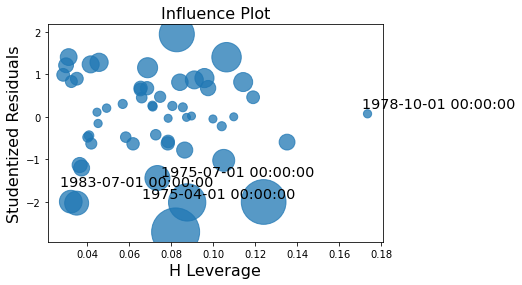

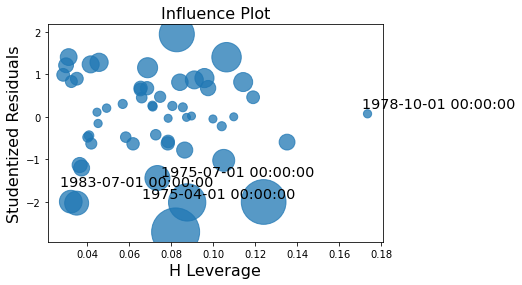

In [71]:
infl.plot_influence()

In [ ]:
infl.plot_index(y_var="cooks", threshold=2 * infl.cooks_distance[0].mean())

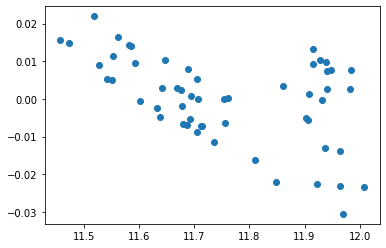

In [72]:
plt.scatter(res.mu, res.resid_pearson)

ValueError: too many values to unpack (expected 2)

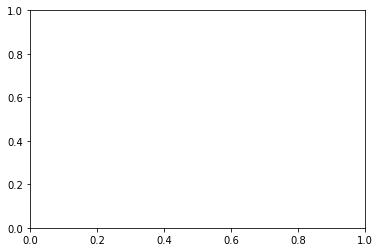

In [63]:
sm.graphics.abline_plot(model_results=res)